This is a purely qualitative analysis. This is why this part is detached from the "benchmarking.ipynb". It does its own 2D "benchmarking" but rather to produce the trajectory points that go into the 2D contour plots. The trajectories seen here should qualitatively represent the ones in the benchmarking, however they are not actual runs that went into the performance tables. 

### Imports

In [1]:
###########
# Imports #
###########


import copy
# importing algorithms
from Stochastic_local_search import*
from Cuadratic_opt_v2 import *
from Scipy_opt_algs import*
from BO_NpScpy import*
# importing test functions
from test_function import*
from utils import *
from COBYQA import *
from ScikitQuant_opt_algs import *
from pySOT_opt_algs import *
from CUATRO import *
from ENTMOOT import *

### Basic lists and values

In [2]:
algorithms_test = [

    #  SRBF,
    #  NDCT_standard_PSO,
    #  NDCT_modified_PSO,
    #  DYCORS,
    COBYLA,
    COBYQA,
    opt_CUATRO,
     ENTMOOT,
    ]


functions_test  = [  #!!! Multimodal before Unimodal!!!
     'Levy_f',
    # 'Ackley_f',
    #'Rosenbrock_f',
    # 'Antonio_f',
    ]
multim  = ['Levy_f']

# no. input dimensions
N_x_ = 2

# repetition for random shift
i_rep = 0
reps         = 10
# randShift_l = np.random.uniform(-3,3, (reps,N_x_))
# x_shift_ = randShift_l[i_rep,:].reshape((N_x_,1))



# bounds and other settings
track_x = True
x_shift_origin = np.array([[0],[0]]) # when wanting to not shift the objective function
bounds_ = np.array([[-7., 7.], [-7., 7.]]) # x1 bounds, x2 bounds these are taken from the benchmarking routine
# bounds_plot = np.array([[-7, 7], [-7, 7]]) 
bounds_plots_             = np.array([
    [[-7,7],[-7,7]], # Levy
    [[-4,1],[-1,4]], # Ackley
    [[-5,3],[-2,5]], # Rosenbrock
    [[-5,3],[-3,3]]  # Antonio
    ])
samples_number = 10 # for BO

SafeData = True

Run 2D contours all in one

In [3]:
# ML4CE_uncon_contour_allin1(functions_test, algorithms_test, N_x_, x_shift_origin, bounds_, bounds_plots_, SafeFig=SafeData)

In [4]:
ML4CE_uncon_contour_allin1_smooth(functions_test, algorithms_test, N_x_, x_shift_origin, reps, bounds_, bounds_plots_, SafeFig=SafeData)

drawing contour


  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [00:00<00:00, 600.43it/s]

COBYLA: Final point (-4.2065, 3.8970), Distance to (1,1) = 5.9582


COBYQA: Final point (-4.2055, 4.0000), Distance to (1,1) = 6.0081
TR update: iteration 2, objective 2.481, evaluation 13


d:\anaconda\envs\chemeng\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:241: UserWarning: You are solving a parameterized problem that is not DPP. Because the problem is not DPP, subsequent solves will not be faster than the first one. For more information, see the documentation on Disciplined Parametrized Programming, at https://www.cvxpy.org/tutorial/dpp/index.html
  warnings.warn(DPP_ERROR_MSG)


TR update: iteration 5, objective 2.401, evaluation 21


d:\anaconda\envs\chemeng\Lib\site-packages\cvxpy\problems\problem.py:1539: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


TR update: iteration 2, objective 2.482, evaluation 13
TR update: iteration 4, objective 2.410, evaluation 20
TR update: iteration 7, objective 2.400, evaluation 26
TR update: iteration 2, objective 2.489, evaluation 13
TR update: iteration 3, objective 2.416, evaluation 18
TR update: iteration 6, objective 2.404, evaluation 24
TR update: iteration 2, objective 2.481, evaluation 13
TR update: iteration 3, objective 2.446, evaluation 17
TR update: iteration 5, objective 2.414, evaluation 21
TR update: iteration 6, objective 2.400, evaluation 23
TR update: iteration 2, objective 2.490, evaluation 13
TR update: iteration 3, objective 2.408, evaluation 17
TR update: iteration 7, objective 2.400, evaluation 25
TR update: iteration 2, objective 2.486, evaluation 13
TR update: iteration 3, objective 2.485, evaluation 16
TR update: iteration 4, objective 2.405, evaluation 18
TR update: iteration 7, objective 2.402, evaluation 24
TR update: iteration 8, objective 2.401, evaluation 26
TR update:

C:\Users\16941\AppData\Local\Temp\ipykernel_89380\3220436450.py:33: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = ax.boxplot(


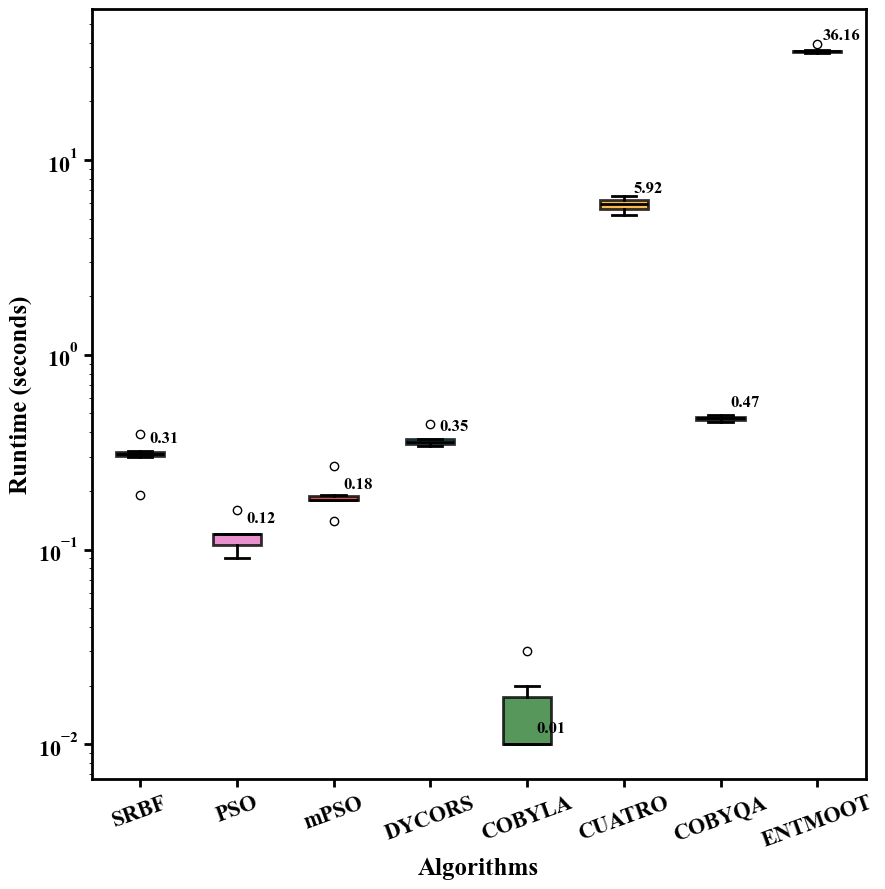

In [5]:
import matplotlib.pyplot as plt
import numpy as np

runtime_results = {
    "SRBF":    {1: 0.30, 2: 0.19, 3: 0.39, 4: 0.31, 5: 0.31, 6: 0.32},
    "PSO":     {1: 0.10, 2: 0.12, 3: 0.16, 4: 0.12, 5: 0.12, 6: 0.09},   # NDCT_standard_PSO
    "mPSO":    {1: 0.18, 2: 0.18, 3: 0.27, 4: 0.19, 5: 0.18, 6: 0.14},   # NDCT_modified_PSO
    "DYCORS":  {1: 0.35, 2: 0.35, 3: 0.44, 4: 0.34, 5: 0.37, 6: 0.36},
    "COBYLA":  {1: 0.01, 2: 0.03, 3: 0.01, 4: 0.010, 5: 0.01, 6: 0.02},
    "CUATRO":  {1: 5.68, 2: 6.25, 3: 6.16, 4: 5.54, 5: 6.55, 6: 5.25},   # opt_CUATRO
    "COBYQA":  {1: 0.47, 2: 0.45, 3: 0.46, 4: 0.48, 5: 0.49, 6: 0.48},
    "ENTMOOT": {1: 35.47, 2: 36.61, 3: 39.42, 4: 36.11, 5: 36.06, 6: 36.21}
}

# 配色顺序
colors = [
    '#555555',  # 深灰蓝
    '#E476C2',  # 粉紫
    '#D62627',  # 鲜红
    '#0BBBCD',  # 青绿
    '#2E7D32',  # 深绿
    '#F9A825',  # 金黄
    '#6A1B9A',  # 紫罗兰
    '#8D6E63'   # 棕色
]

# 收集数据
data = [list(vals.values()) for vals in runtime_results.values()]
labels = list(runtime_results.keys())

# 绘制箱式图
fig, ax = plt.subplots(figsize=(9, 9))
box = ax.boxplot(
    data,
    patch_artist=True,
    labels=labels,
    notch=False,     # 去 notch，更清晰
    widths=0.5       # 箱体宽度
)

# 设置颜色和边框
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.8)
    patch.set_edgecolor("black")
    patch.set_linewidth(2)

# 加粗 whiskers, caps, medians
for element in ['whiskers', 'caps', 'medians']:
    plt.setp(box[element], color="black", linewidth=2)

# 标注中位数数值
for median, vals in zip(box['medians'], data):
    x, y = median.get_xydata()[1]   # 中位数坐标
    ax.text(
        x, y*1.1, f"{np.median(vals):.2f}", 
        ha='center', va='bottom',
        fontsize=12, weight='bold', family="Times New Roman"
    )

# 坐标轴设置
ax.set_ylabel("Runtime (seconds)", fontsize=18, weight='bold', family="Times New Roman")
ax.set_xlabel("Algorithms", fontsize=18, weight='bold', family="Times New Roman")
plt.xticks(rotation=20, fontsize=16, weight='bold', family="Times New Roman")
plt.yticks(fontsize=16, weight='bold', family="Times New Roman")
ax.tick_params(width=2, length=6)

# log 坐标
ax.set_yscale("log")

# 图边框加粗
for spine in ax.spines.values():
    spine.set_linewidth(2.0)

plt.tight_layout()
plt.show()
